Nama: __Indra Rivaldi Siregar__

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import scipy.stats as st

## No 1
Tunjukkan statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice)!

In [2]:
df = pd.read_csv('./train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

__Ukuran Pemusatan__

In [4]:
stat_desk = df[['SalePrice']].describe().T
mode_sale_price = df['SalePrice'].mode()[0]

In [5]:
print('Sale Price')
print('Mean   :', round(stat_desk['mean'][0], 2))
print('Median :', stat_desk['50%'][0])
print('Q1     :', stat_desk['25%'][0])
print('Q3     :', stat_desk['75%'][0])
print('Mode   :', mode_sale_price)

Sale Price
Mean   : 180921.2
Median : 163000.0
Q1     : 129975.0
Q3     : 214000.0
Mode   : 140000


- Mean   : rata-rata harga 1 rumah dari data di atas adalah 180921.2
- Median : 50% harga rumah < 163000 atau 50% harga rumah > 163000
- Q1     : 25% harga rumah < 129975.0
- Q3     : 25% harga rumah > 214000.0
- Mode   : 140000 merupakan harga rumah yang paling banyak diantara harga rumah lainnya.

Jika kita bandingkan nilai mean dan median dari harga rumah, diketahui bahwa nilai mean > median. Hal tersebut dapat mengundang kecurigaan yakni kemungkinan adanya pencilan dari harga rumah yang nilainya sangat tinggi.

__Ukuran Penyebaran__

In [6]:
range_sale_price = df['SalePrice'].max() - df['SalePrice'].min()
std_sale_price = df['SalePrice'].std()
var_sale_price = df['SalePrice'].var()
IQR_sale_price = df['SalePrice'].quantile(0.75) - df['SalePrice'].quantile(0.25)

print('Range              :', round(range_sale_price, 2))
print('Standard Deviation :', round(std_sale_price, 2))
print('Variance           :', round(var_sale_price, 2))
print('IQR                :', round(IQR_sale_price, 2))

Range              : 720100
Standard Deviation : 79442.5
Variance           : 6311111264.3
IQR                : 84025.0


- Range : Selisih harga rumah tertinggi dan terendah adalah 720100.
- Kisaran harga rumah dapat didefinisikan menggunakan rata-rata ± standar deviasi. Artinya, harga rumah berada pada rentang 180921.2 - 79442.5 hingga 180921.2 + 79442.5.
- Nilai interquartile atau jarak antara Q3 dan Q1 dari harga rumah adalah 84025.0. 

## No 2
Tunjukkan statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice) setiap tahunnya (Column Name : YrSold)!

__Ukuran Pemusatan & Ukuran Penyebaran__ 

In [7]:
def q1(i):
    return i.quantile(0.25)

def q3(i):
    return i.quantile(0.75)

def iqr(i):
    return q3(i) - q1(i)

def Range(i):
    return i.max() - i.min()

In [8]:
df_grouped_year = df.groupby('YrSold').agg({'SalePrice':
                                            ['mean', 'median', stats.mode, q1, q3, iqr, Range, 'std']}).reset_index()
df_grouped_year.columns = ['year', 'mean', 'median', 'mode', 'Q1', 'Q3', 'IQR', 'range',  'std']
df_grouped_year

,year,mean,median,mode,Q1,Q3,IQR,range,std
0,2006,182549.458599,163995.0,140000,131375.0,218782.5,87407.5,589689,79426.838855
1,2007,186063.151976,167000.0,144000,129900.0,219500.0,89600.0,715700,85768.171410
2,2008,177360.838816,164000.0,140000,131250.0,207000.0,75750.0,406261,69735.610685
3,2009,179432.103550,162000.0,110000,125250.0,212750.0,87500.0,548033,80879.237311
4,2010,177393.674286,155000.0,140000,128100.0,213250.0,85150.0,556657,80451.280085


Diketahui bahwa harga rata-rata rumah berbeda setiap tahunnya. Harga rata-rata rumah terendah terjadi di tahun 2008, sedangkan harga rata-rata rumah tertinggi terjadi di tahun 2007. Modus dari harga rumah dengan nilai tertinggi juga ditemukan di tahun 2007. Meskipun demikian, berdasarkan nilai range dan std deviasi, kita dapat melihat bahwa di tahun 2007 memiliki rentang harga terbesar atau harganya paling beragam.  

## No 3

Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot tidak terbatas hanya histogram saja. Jelaskan sebaiknya untuk analisa apakah lebih baik menggunakan mean atau menggunakan median? Beserta alasannya (Column Name : SalePrice)

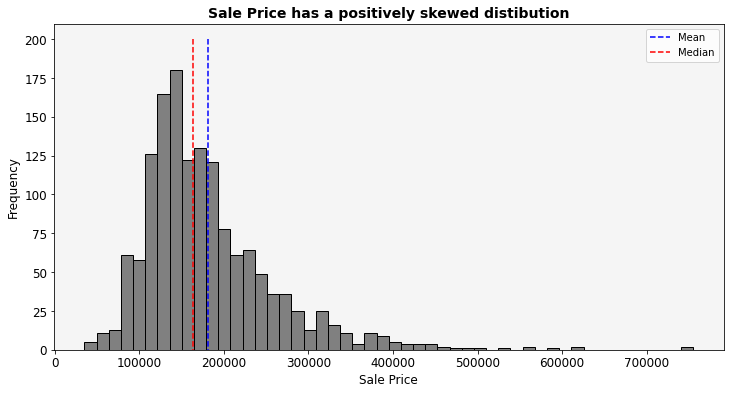

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor("#F5F5F5")

plt.hist(df['SalePrice'], color='grey', edgecolor='black', bins=50)
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Sale Price has a positively skewed distibution', fontsize=14, fontweight='bold')


# plot line dari mean dan median
mean = df['SalePrice'].mean()
median = df['SalePrice'].median()

x_mean = [mean, mean]
y_mean = [200, 0]

x_median = [median, median]
y_median = [200, 0]

plt.plot(x_mean, y_mean, '--b', lw=1.5, label='Mean')
plt.plot(x_median, y_median, '--r', lw=1.5, label='Median')
plt.legend()
plt.show()

Berdasarkan histogram di atas, dapat diamati bahwa distribusi Sale Price condong ke arah kanan, atau disebut *positively skewed distribution*. Dalam kasus seperti ini, analisis yang digunakan sebaiknya tidak menggunakan nilai mean dan sebaiknya menggunakan nilai median. Adanya pencilan dari Sale Price yang nilainya sangat tinggi mengakibatkan nilai mean menjadi lebih besar sehingga kurang baik dalam merepresentasikan distribusi data.

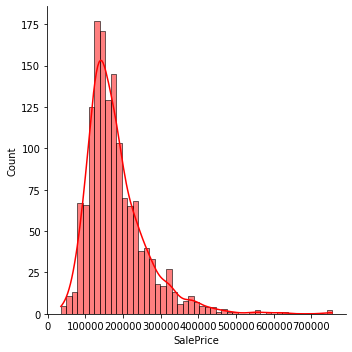

In [10]:
ax = sns.displot(df['SalePrice'], kde=True, color='r')

### Uji Normalitas

In [11]:
from scipy import stats
# Penentuan Hipotesis
H0 = 'Data terdistribusi Normal'
H1 = 'Data tidak terdistribusi Normal'

# Pengujian dengan Shapiro-Wilk Test
stat, p = stats.shapiro(df['SalePrice'])
stat, p

(0.869671642780304, 3.206247534576162e-33)

In [12]:
pvalue = p
alpha = 0.05

if pvalue > alpha:
    print(H0)
else:
    print(H1)

Data tidak terdistribusi Normal


## No 4
Karena ada pernyataan bahwa setiap tahunnya harga rumah itu pasti naik. (tahun terjual : YrSold, harga rumah : SalePrice). Silahkan teman-teman buktikan dengan data yang ada menggunakan ilmu statistika? (Tidak terbatas pada pengujian apapun)

__Penentuan Hipotesis__ <br>
Apakah harga rumah pasti naik setiap tahun? <br>
__H0__ : Rata-rata harga rumah selalu __sama__ setiap tahunnya<br>
__H1__ : Rata-rata harga rumah  __berbeda__ setiap tahunnya

In [13]:
mean_per_year = df.groupby('YrSold').agg({'SalePrice':'mean'}).reset_index()
mean_per_year.rename(columns={'SalePrice':'MeanSalePrice'}, inplace=True)
mean_per_year

,YrSold,MeanSalePrice
0,2006,182549.458599
1,2007,186063.151976
2,2008,177360.838816
3,2009,179432.103550
4,2010,177393.674286


__Pengujian yang digunakan__ <br>
Pada kasus ini pengujian yang akan digunakan adalah **ANOVA** dengan asumsi alpha = **0.05**. Karena rata-rata yang ingin dibandingkan > 2 populasi yakni rata-rata dari 2006 hingga 2010, maka saya memutuskan menggunakan **ANOVA**. [ANOVA satu arah](https://www.rumusstatistik.com/2020/10/anova-satu-arah.html)

In [14]:
years = [2006, 2007, 2008, 2009, 2010]

sale_price_per_year = []
for year in years:
    df_per_year = df[df['YrSold']==year]
    sale_price = df_per_year['SalePrice'].values
    sale_price_per_year.append(sale_price)

In [15]:
anova = st.f_oneway(sale_price_per_year[0], sale_price_per_year[1], sale_price_per_year[2],
                    sale_price_per_year[3], sale_price_per_year[4])
anova

F_onewayResult(statistic=0.6455252211679311, pvalue=0.6300887663573457)

**Hasil pengujian hipotesis & Kesimpulan dan interpretasi**

In [16]:
pvalue = anova.pvalue
alpha = 0.05

print('P-Value :', pvalue)
if pvalue >= alpha:
    print('Tidak cukup bukti untuk menyatakan bahwa rata-rata harga rumah berbeda setiap tahunnya')
else:
    print('Cukup bukti untuk menyatakan bahwa rata-rata harga rumah berbeda setiap tahunnya')

P-Value : 0.6300887663573457
Tidak cukup bukti untuk menyatakan bahwa rata-rata harga rumah berbeda setiap tahunnya


Berdasarkan pengujian hipotesis di atas, dapat disimpulkan bahwa tidak ada perbedaan yang signifikan dari rata-rata harga rumah setiap tahunnya. Atau dengan kata lain, rata-rata harga rumah tidak mengalami kenaikan di setiap tahun. Kesimpulan tersebut ditunjukkan oleh p-value > alpha.

## No 5
Kasus yang akan digunakan adalah membuka akun deposit untuk nasabah bank. Pada kesempatan kali ini data scientist diminta tolong untuk menganalisa hasil ab-testing suatu perusahaan bank. Apakah jumlah campaign mampu meningkatkan keinginan user untuk membuka akun deposit atau tidak?

In [17]:
data = pd.read_csv('bank-full.csv', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


__PEMAHAMAN KONSEP A/B TESTING__
- **Nama experiment** : Pengujian A/B untuk Pengaruh Jumlah Campaign Terhadap Pembukaan Akun Deposit 
- **Hipotesis** : Semakin besar jumlah campaign maka user semakin ingin untuk membuka akun deposit
- **Participant** : user bank
- **Variabel yang akan diuji** : variabel jumlah campaign *(kolom campaign)*
- **Metrics yang digunakan** :
    - Macroconversions : jumlah campaign per user

In [18]:
# Menggunakan Slovin untuk mengetahui minimal sampel yang perlu digunakan
N = data.shape[0]   # jumlah populasi
er = 0.05           # margin of error

slovin = N/(1+N * er**2)
slovin

396.4920742803271

**Sample size dan durasi experiment** : 400 sampel selama 5 hari <br>
- Hasil dari perhitungan slovin menunjukkan bahwa setidaknya jumlah sampel yang dibutuhkan adalah 397. Oleh karena itu, di sini saya bulatkan menjadi 400. Tentunya semakin besar dari 400 mungkin akan cenderung lebih baik, tetapi karena mempertimbangkan efisiensi maka saya memutuskan untuk menggunakan 400 saja. 
- Sampel yang diambil seimbang, terdiri dari 200 user yang jadi deposit dan 200 user yang tidak jadi deposit diambil secara acak.

In [19]:
sample = data.groupby('y').apply(lambda x: x.sample(n=200,random_state=1))
sample

age            job  marital  education default  balance housing  \
y                                                                            
no  23761   35     technician   single   tertiary      no      576      no   
    19840   46  self-employed  married    primary      no      107     yes   
    15387   33     management   single  secondary      no      239     yes   
    17443   33    blue-collar  married  secondary      no        0     yes   
    14868   43     technician  married  secondary      no      714     yes   
...        ...            ...      ...        ...     ...      ...     ...   
yes 22215   30       services   single   tertiary      no     -477      no   
    44114   38         admin.  married  secondary      no     1767     yes   
    31425   27        student   single  secondary      no      213      no   
    44312   40         admin.  married  secondary      no        0      no   
    34921   36     management   single   tertiary      no     7506     yes   

          loan   contact  day month  duration  campaign  pdays  previous  \
y                                                                          
no  23761   no  cellular   28   aug         8        13     -1         0   
    19840   no  cellular    8   aug       109         6     -1         0   
    15387  yes  cellular   18   jul        47         1     -1         0   
    17443  yes  cellular   28   jul        83        12     -1         0   
    14868   no  cellular   16   jul       255         1     -1         0   
...        ...       ...  ...   ...       ...       ...    ...       ...   
yes 22215  yes  cellular   21   aug      1532         2     -1         0   
    44114   no  cellular    9   jul       483         4    239         7   
    31425   no  cellular   27   mar       378         1     -1         0   
    44312   no  cellular   28   jul       496         2    182        11   
    34921   no  cellular    6   may       839         2    188         1   

          poutcome    y  
y                        
no  23761  unknown   no  
    19840  unknown   no  
    15387  unknown   no  
    17443  unknown   no  
    14868  unknown   no  
...            ...  ...  
yes 22215  unknown  yes  
    44114  success  yes  
    31425  unknown  yes  
    44312  success  yes  
    34921  success  yes  

[400 rows x 17 columns]

In [20]:
sample['y'].value_counts()

no     200
yes    200
Name: y, dtype: int64

__PENGUJIAN HIPOTESIS__

- __Penentuan hipotesis__: <br>
      Apakah jumlah campaign dapat meningkatkan keinginan user untuk deposit?
    - **H0** : rata-rata jumlah campaign antara user yang jadi deposit dan tidak jadi deposit adalah **sama**
    - **H1** : rata-rata jumlah campaign user yang jadi deposit **berbeda** dari rata-rata jumlah campaign user yang tidak jadi deposit
- __Pengujian yang digunakan__: T-Test, karena yang ingin dibandingkan rata-rata dari 2 populasi maka saya memutuskan untuk memilih T-Test

- __Deteksi asumsi beserta cara penanganannya__:

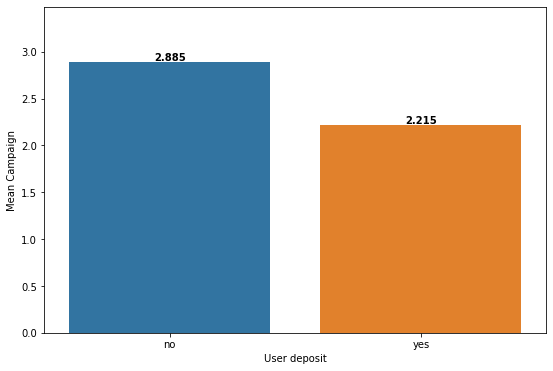

In [21]:
plt.subplots(figsize=(9, 6))
ax = sns.barplot(x = 'y', y= 'campaign', data=sample, estimator=np.mean,
                 errwidth=False)
for label in ax.containers:
    ax.bar_label(label, fontweight='bold')
plt.xlabel('User deposit')
plt.ylabel('Mean Campaign');

***Apakah hasil di atas menunjukkan perbedaan yang signifikan?***

In [22]:
user_yes = sample[sample['y']=='yes'] # user yang jadi deposit
user_no = sample[sample['y']=='no']   # user yang tidak jadi deposit

**Hasil pengujian hipotesis & Kesimpulan dan interpretasi**

In [23]:
ttest = st.ttest_ind(user_yes['campaign'].values, user_no['campaign'].values)
ttest

Ttest_indResult(statistic=-2.8879884660053174, pvalue=0.004088821805535408)

In [24]:
pvalue = ttest.pvalue
alpha = 0.05

print('P-value :', pvalue)
if pvalue >= alpha:
    print('Tidak cukup bukti untuk menyatakan bahwa rata-rata jumlah campaign dapat membedakan keinginan user untuk deposit atau tidak')
    
else:
    print('Cukup bukti untuk menyatakan bahwa rata-rata jumlah campaign dapat membedakan keinginan user untuk deposit atau tidak')

P-value : 0.004088821805535408
Cukup bukti untuk menyatakan bahwa rata-rata jumlah campaign dapat membedakan keinginan user untuk deposit atau tidak


Berdasarkan pengujian hipotesis di atas, diketahui bahwa rata-rata jumlah campaign dapat membedakan keinginan user untuk melakukan deposit atau tidak di bank. Hal tersebut diperoleh dari P-value < alpha.

Akan tetapi, yang menariknya adalah rata-rata campaign yang semakin besar tidak menjamin user akan melakukan deposit.